# Reinforcement Learning Project

## Libraries

In [1]:
import gymnasium as gym
import numpy as np
from typing import Callable, List, Optional
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

## Environment

In [2]:
env = gym.make("LunarLander-v3")#, render_mode="human") 

/Users/antoniooliveira/Documents/GitHub/RL_project/venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


## Solving the Environment

### Random Agent

In [8]:
def run_agent(
    env_name="LunarLander-v3",
    episodes=5,
    render=True,
    seed=None,
    log_fn=None,
    agent_fn=None
):
    import gymnasium as gym
    import numpy as np

    render_mode = "human" if render else None
    env = gym.make(env_name, render_mode=render_mode)

    if seed is not None:
        np.random.seed(seed)
        env.reset(seed=seed)

    episode_rewards = []

    for episode in range(episodes):
        obs, info = env.reset()
        done = False
        total_reward = 0

        while not done:
            if agent_fn:
                action = agent_fn(obs)
            else:
                action = env.action_space.sample()

            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward

        episode_rewards.append(total_reward)
        if log_fn:
            log_fn(episode + 1, total_reward)
        else:
            print(f"Episode {episode + 1} - Total Reward: {total_reward:.2f}")

    env.close()
    return episode_rewards


In [4]:
def my_logger(ep, reward):
    print(f"[LOG] Episode {ep} - Reward: {reward:.2f}")


[LOG] Episode 1 - Reward: -114.47
[LOG] Episode 2 - Reward: -356.30
[LOG] Episode 3 - Reward: -452.22
[LOG] Episode 4 - Reward: -138.25
[LOG] Episode 5 - Reward: -136.90
[LOG] Episode 6 - Reward: -220.64
[LOG] Episode 7 - Reward: -190.34
[LOG] Episode 8 - Reward: -244.92
[LOG] Episode 9 - Reward: -377.58
[LOG] Episode 10 - Reward: -137.74
[LOG] Episode 11 - Reward: -125.13
[LOG] Episode 12 - Reward: -468.68
[LOG] Episode 13 - Reward: -159.79
[LOG] Episode 14 - Reward: -157.06
[LOG] Episode 15 - Reward: -71.31
[LOG] Episode 16 - Reward: -340.57
[LOG] Episode 17 - Reward: -59.81
[LOG] Episode 18 - Reward: -29.56
[LOG] Episode 19 - Reward: -6.66
[LOG] Episode 20 - Reward: -523.88
[LOG] Episode 21 - Reward: -104.65
[LOG] Episode 22 - Reward: -198.09
[LOG] Episode 23 - Reward: -174.39
[LOG] Episode 24 - Reward: -83.30
[LOG] Episode 25 - Reward: -221.05
[LOG] Episode 26 - Reward: -140.39
[LOG] Episode 27 - Reward: -97.81
[LOG] Episode 28 - Reward: -292.61
[LOG] Episode 29 - Reward: -121.53
[

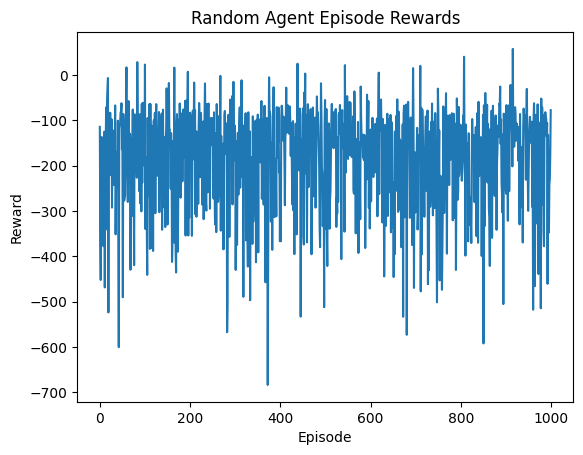

In [9]:
# render --> se quisermos ver a cena a funcionar
rewards = run_random_agent(episodes=1000, seed=42, log_fn=my_logger, render=False)

# Later you can plot:

plt.plot(rewards)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Rule-Based Agent

In [10]:
def rule_based_action(obs):
    x, y, x_dot, y_dot, angle, angle_vel, left_leg, right_leg = obs

    # If on the ground with both legs, do nothing
    if left_leg and right_leg:
        return 0

    # If descending too fast, fire main engine
    if y_dot < -0.5:
        return 2

    # Try to stabilize orientation
    if angle > 0.1:
        return 1  # fire left engine to rotate right
    elif angle < -0.1:
        return 3  # fire right engine to rotate left

    # Otherwise, occasionally fire main engine to keep from falling
    if y < 0.5:
        return 2

    return 0  # default to doing nothing


Episode 1 - Total Reward: -627.54
Episode 2 - Total Reward: -484.33
Episode 3 - Total Reward: -538.49
Episode 4 - Total Reward: -604.53
Episode 5 - Total Reward: -617.20
Episode 6 - Total Reward: -618.19
Episode 7 - Total Reward: -556.49
Episode 8 - Total Reward: -246.63
Episode 9 - Total Reward: -545.36
Episode 10 - Total Reward: -514.74
Episode 11 - Total Reward: -505.03
Episode 12 - Total Reward: -472.07
Episode 13 - Total Reward: -250.46
Episode 14 - Total Reward: -577.35
Episode 15 - Total Reward: -582.02
Episode 16 - Total Reward: -611.03
Episode 17 - Total Reward: -553.99
Episode 18 - Total Reward: -496.96
Episode 19 - Total Reward: -584.85
Episode 20 - Total Reward: -122.91
Episode 21 - Total Reward: -614.18
Episode 22 - Total Reward: -578.23
Episode 23 - Total Reward: -608.36
Episode 24 - Total Reward: -496.53
Episode 25 - Total Reward: -585.02
Episode 26 - Total Reward: -549.85
Episode 27 - Total Reward: -573.30
Episode 28 - Total Reward: -614.23
Episode 29 - Total Reward: -4

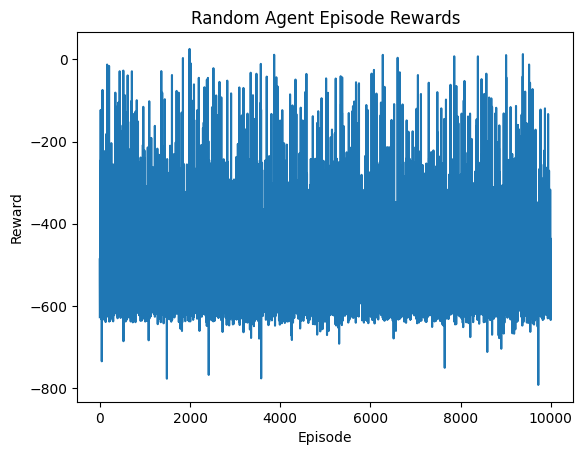

In [14]:
rewards = run_agent(episodes=10000, render=False, seed=1,
                    log_fn = None,
                    agent_fn=rule_based_action)

plt.plot(rewards)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### DQN

In [7]:
def run_episodes(model, env, n_episodes=10):
    episode_rewards = []
    for episode in range(n_episodes):
        obs, info = env.reset()  # unpack both obs and info here
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
        episode_rewards.append(total_reward)
        print(f"Episode {episode+1}: Reward = {total_reward:.2f}")
    return episode_rewards


In [20]:
model = DQN("MlpPolicy", env, verbose=1, seed=42)

timestamps = 200_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | -208     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2124     |
|    time_elapsed     | 0        |
|    total_timesteps  | 378      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02     |
|    n_updates        | 69       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.8     |
|    ep_rew_mean      | -188     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1991     |
|    time_elapsed     | 0        |
|    total_timesteps  | 694      |
| train/              |        

In [21]:
episodes = 1000

rewards = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -157.56
Episode 2: Reward = -118.42
Episode 3: Reward = -145.55
Episode 4: Reward = -80.61
Episode 5: Reward = -105.88
Episode 6: Reward = -97.42
Episode 7: Reward = -140.86
Episode 8: Reward = -102.02
Episode 9: Reward = -127.30
Episode 10: Reward = -145.66
Episode 11: Reward = -57.31
Episode 12: Reward = -120.25
Episode 13: Reward = -78.47
Episode 14: Reward = -143.22
Episode 15: Reward = -63.51
Episode 16: Reward = -84.99
Episode 17: Reward = -106.40
Episode 18: Reward = -152.08
Episode 19: Reward = -38.07
Episode 20: Reward = -91.61
Episode 21: Reward = -100.58
Episode 22: Reward = -72.53
Episode 23: Reward = -116.87
Episode 24: Reward = -145.38
Episode 25: Reward = -124.71
Episode 26: Reward = -142.92
Episode 27: Reward = -109.99
Episode 28: Reward = -42.81
Episode 29: Reward = -136.44
Episode 30: Reward = -121.69
Episode 31: Reward = -99.63
Episode 32: Reward = -72.31
Episode 33: Reward = -148.27
Episode 34: Reward = -91.61
Episode 35: Reward = -64.06
Episode 

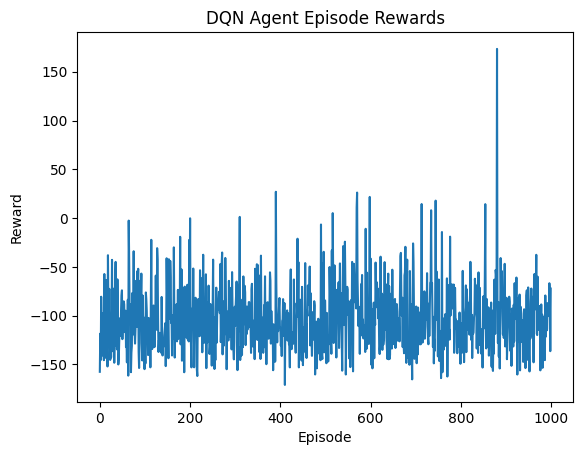

In [22]:
plt.plot(rewards)
plt.title("DQN Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [19]:
model.save(f"./models/lunar_lander/dqn_{timestamps}_after_{episodes}")
#loaded_model = DQN.load("./models/lunar_lander/dqn_{timestamps}_after_{episodes}", env=env)
